# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [79]:
# Loading in required libraries: you will need pandas, seaborn and numpy
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
# Reading in the Nobel Prize data
nobel = pd.read_csv("nobel.csv")
nobel.head()
# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...




,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [16]:
# Missing values represented by 'True'
nobel.isnull().head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False


In [ ]:
Pandas isnull() and notnull() methods are used to check and manage NULL values in a data frame.

In [17]:
# How many Entries do we have?
# 
nobel.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [18]:
len(nobel)

911

In [19]:
# Percentage of the Entries
nobel.isnull().sum() / len(nobel) * 100

year                     0.000000
category                 0.000000
prize                    0.000000
motivation               9.659715
prize_share              0.000000
laureate_id              0.000000
laureate_type            0.000000
full_name                0.000000
birth_date               3.073546
birth_city               3.073546
birth_country            2.854007
sex                      2.854007
organization_name       27.003293
organization_city       26.783754
organization_country    26.783754
death_date              34.906696
death_city              36.772777
death_country           36.114160
dtype: float64

In [20]:
# The number of Trues represented by: NaN
pd.Series([nobel.isnull]).sum()

<bound method DataFrame.isnull of      year    category                                              prize  \
0    1901   Chemistry                  The Nobel Prize in Chemistry 1901   
1    1901  Literature                 The Nobel Prize in Literature 1901   
2    1901    Medicine     The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                         The Nobel Peace Prize 1901   
4    1901       Peace                         The Nobel Peace Prize 1901   
5    1901     Physics                    The Nobel Prize in Physics 1901   
6    1902   Chemistry                  The Nobel Prize in Chemistry 1902   
7    1902  Literature                 The Nobel Prize in Literature 1902   
8    1902    Medicine     The Nobel Prize in Physiology or Medicine 1902   
9    1902       Peace                         The Nobel Peace Prize 1902   
10   1902       Peace                         The Nobel Peace Prize 1902   
11   1902     Physics                    The Nobel Pri

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [21]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...


# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...

In [22]:
# Nobel prize shared possibly.
nobel['prize_share'].value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

In [23]:
# Male and Female nobel prize winners.
nobel['sex'].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [24]:
# Prizes won by top 10 nationalities.
# use .head() to get the top 10 nationalities
nobel['birth_country'].value_counts().head(10)


United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

 This is the top 10 nationalities with the USA on top.

 Which countries win most often?

In [ ]:
#  The countries that win most often are usa,uk,fra and germ

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [25]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winners'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10 ) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winners'].mean()


# Display the proportions of USA born winners per decade
prop_usa_winners


,decade,usa_born_winners
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


 usa_born_winners have been winning the nobel prize for 11 decades.

In [47]:
# usa born winners
nobel['birth_country'].value_counts().head(1)

United States of America    259
Name: birth_country, dtype: int64

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

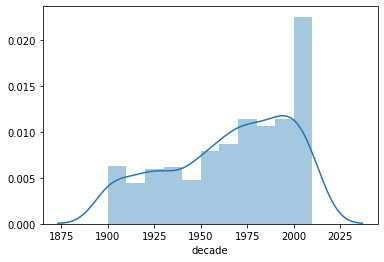

In [51]:
#using seaborn, plot the proportion of US winners by decade
sns.distplot(nobel['decade'])


In [52]:
What can you conclude from the graph?
# The has usa_born_winners winnings are increasing with decades 


Object `graph` not found.


## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [56]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel['female_winner'].mean()
prop_female_winners
nobel.groupby(['decade']).mean()
# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...


,year,laureate_id,usa_born_winners,female_winner
decade,,,,
1900,1905.035088,301.087719,0.017544,0.052632
1910,1913.775000,296.800000,0.075000,0.025000
1920,1924.703704,314.611111,0.074074,0.037037
1930,1934.571429,312.946429,0.250000,0.053571
1940,1946.069767,330.534884,0.302326,0.069767
1950,1954.541667,312.625000,0.291667,0.000000
1960,1964.683544,343.227848,0.265823,0.037975
1970,1974.711538,391.990385,0.317308,0.038462
1980,1984.546392,389.298969,0.319588,0.041237


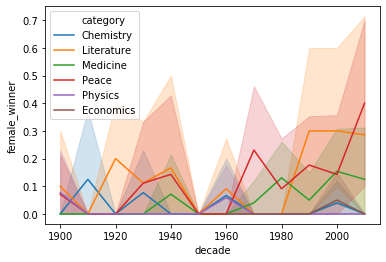

In [73]:
# plot 

sns.lineplot( x  = 'decade', y = 'female_winner', hue = 'category', data = nobel)

 Interpret your plot here
 
 the category that is mostly won by the females is in literature and the nobel peace prize 
 seems like they are not likely to win for physics so few of them win.

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [43]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
woman = nobel[(nobel['sex'] == 'Female')]
woman.head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winners,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False


In [ ]:
# to find the the first female to win the nobel prize we use the nobel.index

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [85]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
multiple_winner = pd.DataFrame(nobel['full_name'])





How many people have received 2 or more prizes?

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [0]:
# Converting birth_date from String to datetime
nobel['birth_date'] = ...

# Calculating the age of Nobel Prize winners
nobel['age'] = ...

# What is the mean age of winners and it's standard devation? What is the median age?

## 9. Age differences between prize categories


In [0]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...

# Plot the age of nobel candidates by decade and prize category

What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

## Congratulations! You've reached the end of the challenge!